In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis = 1)
y = df["Sales"]

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
df_model = Ridge().fit(X_train, y_train)
y_pred = df_model.predict(X_test)
r2Score = r2_score(y_test, y_pred)
meanAbsScore = mean_absolute_error(y_test, y_pred)
meanSqScore = mean_squared_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)

end_time = time.time()

print("R2:" + str(r2Score))
print("Mean Absolute Error:" + str(meanAbsScore))
print("Mean Squared Error:" + str(meanSqScore))
print("MAPE:" + str(MAPE))
elapsed_time = end_time - start_time
print("Elapsed Time: ", elapsed_time, " seconds")

R2:0.6419308906447154
Mean Absolute Error:593.8941451473764
Mean Squared Error:573872.6166420861
MAPE:0.3670370658488478
Elapsed Time:  0.0037870407104492188  seconds


In [47]:
# K-fold

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis = 1)
y = df["Sales"]

start_time = time.time()

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

r2_scores = []
mae_scores = []
mse_scores = []
mape_scores = []
elapsed_times = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model = Ridge().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2Score = r2_score(y_test, y_pred)
    meanAbsScore = mean_absolute_error(y_test, y_pred)
    meanSqScore = mean_squared_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    
    r2_scores.append(r2Score)
    mae_scores.append(meanAbsScore)
    mse_scores.append(meanSqScore)
    mape_scores.append(MAPE)
    

mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_mape = np.mean(mape_scores)

end_time = time.time()

print("R2 Scores:", mean_r2)
print("Mean Absolute Error Scores:", mean_mae)
print("Mean Squared Error Scores:", mean_mse)
print("MAPE Scores:", mean_mape)

elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

R2 Scores: 0.5842324037970198
Mean Absolute Error Scores: 607.7485095793545
Mean Squared Error Scores: 596939.0549729906
MAPE Scores: 0.4763310878491495
Elapsed Time: 0.02768874168395996 seconds


In [52]:
# K-fold and Parameter Optimizations

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis = 1)
y = df["Sales"]

start_time = time.time()

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

alpha_values = np.linspace(0, 1000, num=1001)
mean_r2_scores = []

for alpha in alpha_values:
    r2_scores = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model = Ridge(alpha=alpha).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2Score = r2_score(y_test, y_pred)
        r2_scores.append(r2Score)
    
    mean_r2_scores.append(np.mean(r2_scores))
    
     
end_time = time.time()

# print(mean_r2_scores)
elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")
max_mean_r2 = max(mean_r2_scores)
print("Maximum R2 Score:", max_mean_r2)
max_r2_index = mean_r2_scores.index(max(mean_r2_scores))
optimal_alpha = alpha_values[max_r2_index]
print("Optimal alpha value:", optimal_alpha)

Elapsed Time: 21.647636651992798 seconds
Maximum R2 Score: 0.5945013273891568
Optimal alpha value: 1.0


Elapsed Time: 22.033677577972412 seconds
Optimal alpha value: 1.0
Maximum R2 Score: 0.5987411469992574


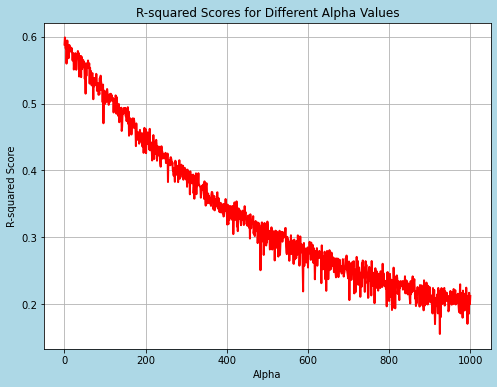

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

start_time = time.time()

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

alpha_values = np.linspace(0, 1000, num=1001)
mean_r2_scores = []

for alpha in alpha_values:
    r2_scores = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model = Ridge(alpha=alpha).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
    
    mean_r2_scores.append(np.mean(r2_scores))

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

max_mean_r2 = max(mean_r2_scores)
max_r2_index = mean_r2_scores.index(max_mean_r2)
optimal_alpha = alpha_values[max_r2_index]
print("Optimal alpha value:", optimal_alpha)
print("Maximum R2 Score:", max_mean_r2)

# Plotting the R-squared values
plt.figure(figsize=(8, 6), facecolor='lightblue')  # Set the figure size and color
plt.plot(alpha_values, mean_r2_scores, color='red', linewidth=2)  # Set the line color and width
plt.xlabel("Alpha")
plt.ylabel("R-squared Score")
plt.title("R-squared Scores for Different Alpha Values")
plt.grid(True)  # Add a grid
plt.show()

Elapsed Time: 21.853978872299194 seconds
Optimal alpha value: 6.0
Maximum R2 Score: 0.6021753424182692
Mean Absolute Error (MAE): 609.209418173745
Mean Squared Error (MSE): 602990.8889706552
Root Mean Squared Error (RMSE): 774.3702906932756


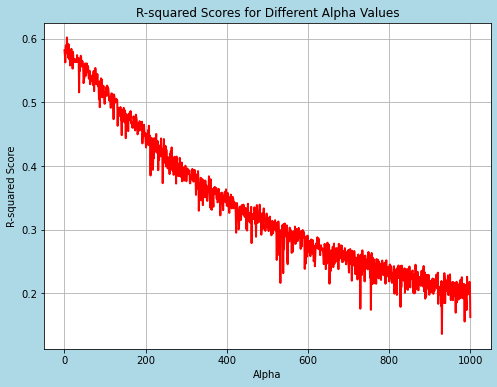

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

start_time = time.time()

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

alpha_values = np.linspace(0, 1000, num=1001)
mean_r2_scores = []

for alpha in alpha_values:
    r2_scores = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model = Ridge(alpha=alpha).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
    
    mean_r2_scores.append(np.mean(r2_scores))

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

max_mean_r2 = max(mean_r2_scores)
max_r2_index = mean_r2_scores.index(max_mean_r2)
optimal_alpha = alpha_values[max_r2_index]
print("Optimal alpha value:", optimal_alpha)
print("Maximum R2 Score:", max_mean_r2)

# Calculating MAE, MSE, and RMSE using the optimal alpha value
mae_scores = []
mse_scores = []
rmse_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model = Ridge(alpha=optimal_alpha).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean Absolute Error (MAE):", mean_mae)
print("Mean Squared Error (MSE):", mean_mse)
print("Root Mean Squared Error (RMSE):", mean_rmse)

# Plotting the R-squared values
plt.figure(figsize=(8, 6), facecolor='lightblue')
plt.plot(alpha_values, mean_r2_scores, color='red', linewidth=2)
plt.xlabel("Alpha")
plt.ylabel("R-squared Score")
plt.title("R-squared Scores for Different Alpha Values")
plt.grid(True)
plt.show()

Elapsed Time: 22.195060968399048 seconds
Optimal alpha value: 12.0
Maximum R2 Score: 0.5386475477802183
Mean Absolute Error (MAE): 645.2858934250265
Mean Squared Error (MSE): 682034.4872389727
Root Mean Squared Error (RMSE): 822.4236416737704


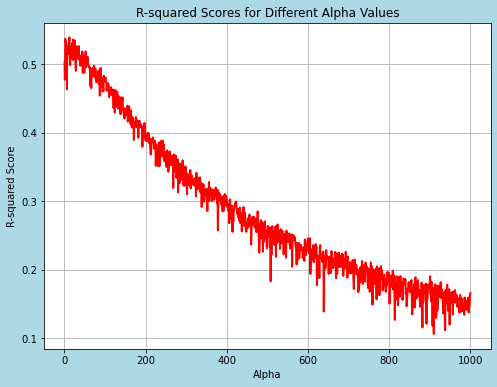

In [1]:
# Feature Selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

df = df.drop('Month', axis=1)
df = df.drop('Gold', axis=1)
df = df.drop('School', axis=1)
df = df.drop('Work', axis=1)
df = df.drop('CPI', axis=1)
df = df.drop('Unemployment', axis=1)
df = df.drop('Weather', axis=1)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

start_time = time.time()

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

alpha_values = np.linspace(0, 1000, num=1001)
mean_r2_scores = []

for alpha in alpha_values:
    r2_scores = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model = Ridge(alpha=alpha).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
    
    mean_r2_scores.append(np.mean(r2_scores))

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

max_mean_r2 = max(mean_r2_scores)
max_r2_index = mean_r2_scores.index(max_mean_r2)
optimal_alpha = alpha_values[max_r2_index]
print("Optimal alpha value:", optimal_alpha)
print("Maximum R2 Score:", max_mean_r2)

# Calculating MAE, MSE, and RMSE using the optimal alpha value
mae_scores = []
mse_scores = []
rmse_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model = Ridge(alpha=optimal_alpha).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean Absolute Error (MAE):", mean_mae)
print("Mean Squared Error (MSE):", mean_mse)
print("Root Mean Squared Error (RMSE):", mean_rmse)

# Plotting the R-squared values
plt.figure(figsize=(8, 6), facecolor='lightblue')
plt.plot(alpha_values, mean_r2_scores, color='red', linewidth=2)
plt.xlabel("Alpha")
plt.ylabel("R-squared Score")
plt.title("R-squared Scores for Different Alpha Values")
plt.grid(True)
plt.show()